In [4]:
from __future__ import print_function
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
from torch.utils.data import Dataset 
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
from collections import defaultdict
import pdb
import torch.distributions as tdist
from tqdm import tqdm
import matplotlib
% matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

In [2]:

    
# def g_loss(d_fake_score,c=1):
#     return 0.50 * torch.mean((d_fake_score - c)**2)


# def d_loss(d_real,d_fake, a=0, b=1):
#     return  (0.50 * torch.mean((d_real - b)**2)) + (0.50 * torch.mean((d_fake - a)**2))

    

def g_loss(d_fake_score, activation_func, conjugate):
    g_loss_kl = -torch.mean(conjugate(activation_func(d_fake_score)))
    return g_loss_kl

def d_loss(d_real,d_fake, activation_func, conjugate):
    return -(torch.mean(activation_func(d_real)) - torch.mean(conjugate(activation_func(d_fake))))



100%|██████████| 800/800 [00:00<00:00, 2668.67it/s]


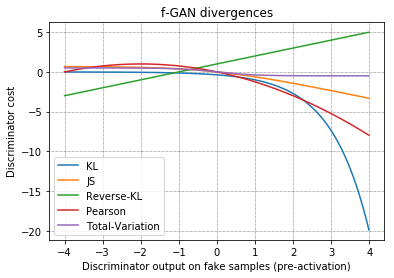

In [6]:
distances = ['KL','JS','Reverse-KL','Pearson','Total-Variation']
hmap=[]

for div in distances:
    
    if div == 'KL':
        def activation_func(x):
            return x

        def conjugate(x):
            return torch.exp(x - 1)

    elif div == 'Reverse-KL':
        def activation_func(x):
            return -torch.exp(-x)

        def conjugate(x):
            return -1 - torch.log(-x)

    elif div == 'JS':
        def activation_func(x):
            return torch.log(2.0 / (1 + torch.exp(-x)))

        def conjugate(x):
            return -torch.log(2 - torch.exp(x))
    elif div == 'Pearson':
        def activation_func(x):
            return x

        def conjugate(x):
            return 0.25 * torch.pow(x, 2) + x
    elif div == 'Total-Variation':
        def activation_func(x):
            return 0.5 * torch.tanh(x)

        def conjugate(x):
            return x

    
    x = []
    y=[]
    heatmap = np.zeros((800,800))
    for d_fake_output in tqdm(range(-400,400)):
        input_tensor = torch.Tensor([float(d_fake_output)/100.]).cuda()

        x.append(input_tensor)
        y.append(g_loss(input_tensor, activation_func, conjugate).data.cpu().numpy())
            
    plt.plot(x,y)
plt.grid(linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Discriminator output on fake samples (pre-activation)')   
plt.ylabel('Discriminator cost')    
plt.title('f-GAN divergences')
plt.legend(distances)
        

In [42]:
# distances = ['KL','JS','Reverse-KL','Pearson','Total-Variation']
# hmap=[]

# for div in distances:
    
#     if div == 'KL':
#         def activation_func(x):
#             return x

#         def conjugate(x):
#             return torch.exp(x - 1)

#     elif div == 'Reverse-KL':
#         def activation_func(x):
#             return -torch.exp(-x)

#         def conjugate(x):
#             return -1 - torch.log(-x)

#     elif div == 'JS':
#         def activation_func(x):
#             return torch.log(2.0 / (1 + torch.exp(-x)))

#         def conjugate(x):
#             return -torch.log(2 - torch.exp(x))
#     elif div == 'Pearson':
#         def activation_func(x):
#             return x

#         def conjugate(x):
#             return 0.25 * torch.pow(x, 2) + x
#     elif div == 'Total-Variation':
#         def activation_func(x):
#             return 0.5 * torch.tanh(x)

#         def conjugate(x):
#             return x

    
#     x = []
#     y=[]
#     heatmap = np.zeros((800,800))
#     for d_fake_output in tqdm(range(-400,400)):
#         for d_real_output in range(-400,400):
#             input_tensor = torch.Tensor([float(d_fake_output)/100.]).cuda()
#             input_real_tensor = torch.Tensor([float(d_real_output)/100.]).cuda()

# #             x.append(input_tensor)
#             heatmap[400+d_fake_output, 400+d_real_output] = d_loss(input_real_tensor,input_tensor, activation_func, conjugate).data.cpu().numpy()
#     hmap.append(heatmap)
            
# #     plt.plot(x,y)
# # plt.grid(linestyle=':', linewidth='0.5', color='black')
# # plt.xlabel('Discriminator output on fake samples (pre-activation)')   
# # plt.ylabel('Discriminator cost')    
# # plt.title('f-GAN divergences')
# # plt.legend(distances)
        

100%|██████████| 800/800 [02:13<00:00,  5.98it/s]


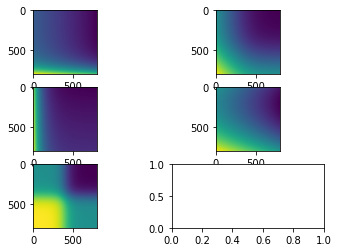

In [49]:
# # heatmap, xedges, yedges = np.histogram2d(x, y, bins=(64,64))
# # extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# # Plot heatmap
# fig,ax = plt.subplots(3,2)
# ax[0,0].imshow(hmap[0])
# ax[0,1].imshow(hmap[1])
# ax[1,0].imshow(hmap[2])
# ax[1,1].imshow(hmap[3])
# ax[2,0].imshow(hmap[4])
# # plt.title('Pythonspot.com heatmap example')
# # plt.ylabel('y')
# # plt.xlabel('x')
# # plt
# # plt.show()


Text(0.5, 0, 'D(x)')

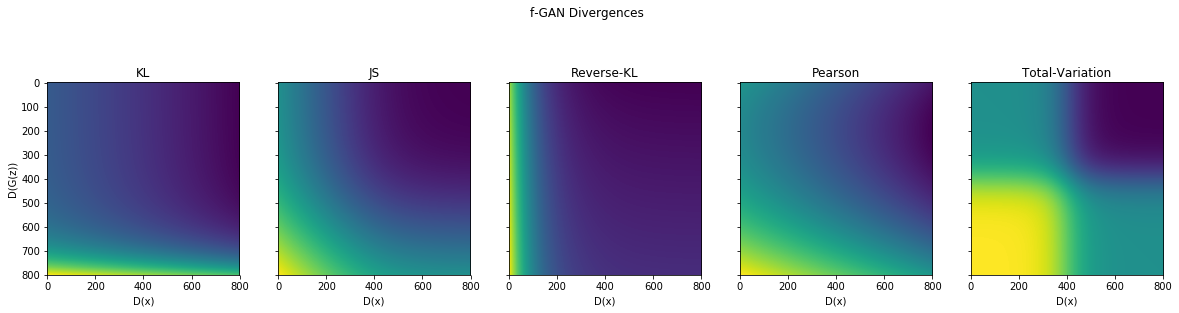

In [59]:
# f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize=(20,5))
# f.suptitle('f-GAN Divergences')
# ax1.imshow(hmap[0])
# ax1.set_title(distances[0])
# ax1.set_xlabel('D(x)')
# ax1.set_ylabel('D(G(z))')

# ax2.imshow(hmap[1])
# ax2.set_title(distances[1])
# ax2.set_xlabel('D(x)')

# ax3.imshow(hmap[2])
# ax3.set_title(distances[2])
# ax3.set_xlabel('D(x)')

# ax4.imshow(hmap[3])
# ax4.set_title(distances[3])
# ax4.set_xlabel('D(x)')

# ax5.imshow(hmap[4])
# ax5.set_title(distances[4])
# ax5.set_xlabel('D(x)')
